# Project Assignment 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv("ds_salaries_modified.csv")

In [4]:
# Selecting the important columns specified by the user
important_columns = ["work_year", "experience_level", "job_title", "salary_in_usd", "remote_ratio", "company_location", "company_size", "employee_residence"]
df_selected = df[important_columns]

In [5]:
df_selected

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,employee_residence
0,2023,SE,Principal Data Scientist,85847,100,ES,L,ES
1,2023,MI,ML Engineer,30000,100,US,S,US
2,2023,MI,ML Engineer,25500,100,US,S,US
3,2023,SE,Data Scientist,175000,100,CA,M,CA
4,2023,SE,Data Scientist,120000,100,CA,M,CA
...,...,...,...,...,...,...,...,...
3768,2022,MI,Data Scientist,30523,100,IN,L,IN
3769,2023,SE,Data Analyst,128500,0,US,M,US
3770,2023,SE,Data Architect,92000,100,GB,M,GB
3771,2022,EN,Data Engineer,160000,0,US,M,US


In [6]:
# Checking basic information about the selected columns
df_info = df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3773 non-null   int64 
 1   experience_level    3773 non-null   object
 2   job_title           3763 non-null   object
 3   salary_in_usd       3773 non-null   int64 
 4   remote_ratio        3773 non-null   int64 
 5   company_location    3773 non-null   object
 6   company_size        3767 non-null   object
 7   employee_residence  3761 non-null   object
dtypes: int64(3), object(5)
memory usage: 235.9+ KB


In [7]:
# Summary statistics for quantitative columns
quantitative_columns = ["salary_in_usd", "remote_ratio"]

for col in quantitative_columns:
    print(f"Statistics for {col}:")
    print(f"Mean : {df[col].mean()}")
    print(f"Median : {df[col].median()}")
    print(f"Mode : {df[col].mode()[0]}")  
    print(f"Standard Deviation : {df[col].std()}")
    print(f"Range : {df[col].min()} - {df[col].max()}")
    print("\n")


Statistics for salary_in_usd:
Mean : 137509.51126424596
Median : 135000.0
Mode : 100000
Standard Deviation : 63042.2252169619
Range : 5132 - 450000


Statistics for remote_ratio:
Mean : 46.30267691492181
Median : 0.0
Mode : 0
Standard Deviation : 48.57710890737816
Range : 0 - 100




In [8]:
# Checking missing data


missing_data = df_selected.isnull().sum()
missing_data

work_year              0
experience_level       0
job_title             10
salary_in_usd          0
remote_ratio           0
company_location       0
company_size           6
employee_residence    12
dtype: int64

In [9]:
# Unique value counts for categorical columns
# nunique() -> "number of unique"
categorical_columns = ["experience_level", "job_title", "company_location", "company_size"]
unique_counts = df_selected[categorical_columns].nunique()
unique_counts

experience_level     4
job_title           93
company_location    72
company_size         3
dtype: int64

In [10]:
# top 5 values in "job_title"
top_5_job_titles = df_selected["job_title"].value_counts().head(5)
top_5_job_titles

job_title
Data Engineer                1041
Data Scientist                841
Data Analyst                  614
Machine Learning Engineer     289
Analytics Engineer            103
Name: count, dtype: int64

In [11]:
# top 5 values in "company_location"
top_5_company_locations = df_selected["company_location"].value_counts().head(5)
top_5_company_locations

company_location
US    3051
GB     173
CA      88
ES      77
IN      60
Name: count, dtype: int64

# Project Assignment 2

### 1. data quality analysis

In [14]:
# Quantify Missing Values
missing_values = df_selected.isnull().sum()
missing_values

work_year              0
experience_level       0
job_title             10
salary_in_usd          0
remote_ratio           0
company_location       0
company_size           6
employee_residence    12
dtype: int64

In [15]:
# Unique Value Counts (to identify low-information columns)
unique_counts = df_selected.nunique()
unique_counts 
# All fields have business value and cannot be deleted even if some fields contains few unique values.

work_year                4
experience_level         4
job_title               93
salary_in_usd         1035
remote_ratio             3
company_location        72
company_size             3
employee_residence      78
dtype: int64

### 2: Check for Duplicate Rows

In [17]:
duplicate_rows = df_selected[df_selected.duplicated(keep='first')]
print(f"Total duplicate rows: {duplicate_rows.shape[0]}")
duplicate_rows

Total duplicate rows: 1178


,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,employee_residence
115,2023,SE,Data Scientist,150000,0,US,M,US
123,2023,SE,Analytics Engineer,289800,0,US,M,US
153,2023,MI,Data Engineer,100000,100,US,M,US
154,2023,MI,Data Engineer,70000,100,US,M,US
160,2023,SE,Data Engineer,115000,0,US,M,US
...,...,...,...,...,...,...,...,...
3768,2022,MI,Data Scientist,30523,100,IN,L,IN
3769,2023,SE,Data Analyst,128500,0,US,M,US
3770,2023,SE,Data Architect,92000,100,GB,M,GB
3771,2022,EN,Data Engineer,160000,0,US,M,US


### 3. Data Cleaning Approach

In [19]:
# Drop duplicate rows
df_cleaned = df_selected.drop_duplicates()
print(f"Total rows BEFORE dropping duplicate rows: {df_selected.shape[0]}")
print(f"Total duplicate rows: {duplicate_rows.shape[0]}")
print(f"Total rows AFTER dropping duplicate rows: {df_cleaned.shape[0]}")
df_cleaned  # DataFrame without duplicate records

Total rows BEFORE dropping duplicate rows: 3773
Total duplicate rows: 1178
Total rows AFTER dropping duplicate rows: 2595


,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,employee_residence
0,2023,SE,Principal Data Scientist,85847,100,ES,L,ES
1,2023,MI,ML Engineer,30000,100,US,S,US
2,2023,MI,ML Engineer,25500,100,US,S,US
3,2023,SE,Data Scientist,175000,100,CA,M,CA
4,2023,SE,Data Scientist,120000,100,CA,M,CA
...,...,...,...,...,...,...,...,...
3750,2020,SE,Data Scientist,412000,100,US,L,US
3751,2021,MI,Principal Data Scientist,151000,100,US,L,US
3752,2020,EN,Data Scientist,105000,100,US,S,US
3753,2020,EN,Business Data Analyst,100000,100,US,L,US


In [20]:
# Handle missing values
# - Drop rows where job_title is missing (essential info)
df_cleaned = df_cleaned.dropna(subset=['job_title'])
print(f"Total rows AFTER dropping row of missing job_title: {df_cleaned.shape[0]}")
df_cleaned  # DataFrame without missing job_title

Total rows AFTER dropping row of missing job_title: 2585


,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,employee_residence
0,2023,SE,Principal Data Scientist,85847,100,ES,L,ES
1,2023,MI,ML Engineer,30000,100,US,S,US
2,2023,MI,ML Engineer,25500,100,US,S,US
3,2023,SE,Data Scientist,175000,100,CA,M,CA
4,2023,SE,Data Scientist,120000,100,CA,M,CA
...,...,...,...,...,...,...,...,...
3750,2020,SE,Data Scientist,412000,100,US,L,US
3751,2021,MI,Principal Data Scientist,151000,100,US,L,US
3752,2020,EN,Data Scientist,105000,100,US,S,US
3753,2020,EN,Business Data Analyst,100000,100,US,L,US


In [21]:
# Handle missing values
# - Fill missing values in company_size with the mode
df_cleaned.loc[:, 'company_size'] = df_cleaned['company_size'].fillna(df_cleaned['company_size'].mode()[0])
df_cleaned['company_size'] # DataFrame without missing company_size

0       L
1       S
2       S
3       M
4       M
       ..
3750    L
3751    L
3752    S
3753    L
3754    L
Name: company_size, Length: 2585, dtype: object

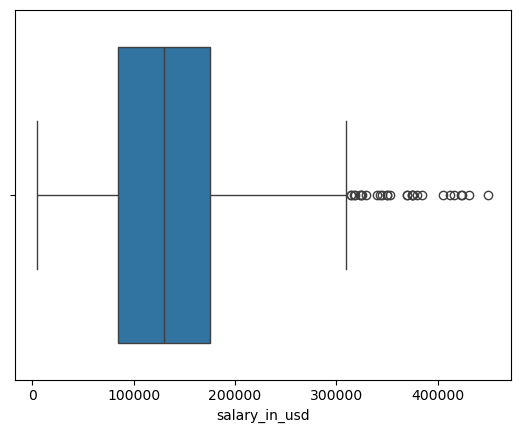

In [22]:
sns.boxplot(x=df_cleaned["salary_in_usd"])  
plt.show()

In [23]:
# Check Outlier Values of "salary_in_usd"  
numerical_columns = ["salary_in_usd"]
Q1 = df_cleaned[numerical_columns].quantile(0.25)
Q3 = df_cleaned[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
# calculate Outlier Values of "salary_in_usd"outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("lower_bound = ", lower_bound.values[0])
print("upper_bound = ", upper_bound.values[0])

lower_bound =  -50000.0
upper_bound =  310000.0


In [24]:
# Fix outlier

# Calculate the average salary_in_usd    
mean_value = int(df_cleaned["salary_in_usd"].mean())

# Replace outliers (those greater than 315250) with the mean value
df_cleaned.loc[df_cleaned["salary_in_usd"] > 315250, "salary_in_usd"] = mean_value
df_cleaned

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,employee_residence
0,2023,SE,Principal Data Scientist,85847,100,ES,L,ES
1,2023,MI,ML Engineer,30000,100,US,S,US
2,2023,MI,ML Engineer,25500,100,US,S,US
3,2023,SE,Data Scientist,175000,100,CA,M,CA
4,2023,SE,Data Scientist,120000,100,CA,M,CA
...,...,...,...,...,...,...,...,...
3750,2020,SE,Data Scientist,133340,100,US,L,US
3751,2021,MI,Principal Data Scientist,151000,100,US,L,US
3752,2020,EN,Data Scientist,105000,100,US,S,US
3753,2020,EN,Business Data Analyst,100000,100,US,L,US


In [25]:
# Convert Data Types for Consistency
# The salary data type is changed to "integer"
df_cleaned.loc[:, "salary_in_usd"] = df_cleaned["salary_in_usd"].astype(int)

# remote_ratio is displayed as a percentage, but the value is still int, so it can be directly calculated in the future

df_cleaned = df_cleaned.style.format({"remote_ratio": "{}%"})
print(df_cleaned)
df_cleaned = df_cleaned.data

In [26]:
df_cleaned.head()

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,employee_residence
0,2023,SE,Principal Data Scientist,85847,100,ES,L,ES
1,2023,MI,ML Engineer,30000,100,US,S,US
2,2023,MI,ML Engineer,25500,100,US,S,US
3,2023,SE,Data Scientist,175000,100,CA,M,CA
4,2023,SE,Data Scientist,120000,100,CA,M,CA


###  Summary of Cleaned Data

In [28]:
# Data Shape
final_shape = df_cleaned.shape
final_shape    #(rows,columns)

(2585, 8)

In [29]:
# Data Type
final_dtypes = df_cleaned.dtypes
final_dtypes

work_year              int64
experience_level      object
job_title             object
salary_in_usd          int64
remote_ratio           int64
company_location      object
company_size          object
employee_residence    object
dtype: object

# Project Assignment 4

***Calculate derivative data***  
- create new columns "salary_level" and "role_category"

##### Derivative Data "salary_level":

In [33]:
# Ensure the 'salary_level' column exists
mean_salary = df_cleaned['salary_in_usd'].mean()
std_dev_salary = df_cleaned['salary_in_usd'].std()

# Define the thresholds for salary levels
low_threshold = mean_salary - std_dev_salary
high_threshold = mean_salary + std_dev_salary

# Create the 'salary_level' column based on the thresholds
df_cleaned['salary_level'] = pd.cut(df_selected['salary_in_usd'],
                                     bins=[0, low_threshold, high_threshold, float('inf')],
                                     labels=['Low', 'Medium', 'High'])

# Display the updated DataFrame to verify the changes
df_cleaned.head()

/var/folders/g6/ypqsg6fx0cv23h420cpm0r7w0000gn/T/ipykernel_6165/3173648758.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['salary_level'] = pd.cut(df_selected['salary_in_usd'],


,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,employee_residence,salary_level
0,2023,SE,Principal Data Scientist,85847,100,ES,L,ES,Medium
1,2023,MI,ML Engineer,30000,100,US,S,US,Low
2,2023,MI,ML Engineer,25500,100,US,S,US,Low
3,2023,SE,Data Scientist,175000,100,CA,M,CA,Medium
4,2023,SE,Data Scientist,120000,100,CA,M,CA,Medium


##### Derivative Data "role_category":

In [35]:
# Define the function to categorize job roles
def categorize_role(job_title):
    technical_roles = [
        'Data Scientist', 'ML Engineer', 'Machine Learning Engineer', 'Applied Scientist', 'Data Modeler', 'Data Engineer',
        'Computer Vision Engineer', 'AI Developer', 'Research Engineer', 'Applied Machine Learning Engineer', 'Data Architect',
        'Machine Learning Scientist', 'Big Data Engineer', 'Cloud Database Engineer', 'Software Data Engineer',
        'Data Infrastructure Engineer', 'Data Operations Engineer', 'Deep Learning Researcher', 'Deep Learning Engineer',
        'Machine Learning Infrastructure Engineer', 'NLP Engineer', 'Machine Learning Developer', '3D Computer Vision Researcher',
        'Principal Machine Learning Engineer', 'Machine Learning Research Engineer', 'Machine Learning Software Engineer',
        'Cloud Data Engineer', 'Machine Learning Manager', 'Lead Machine Learning Engineer', 'ETL Developer',
        'Cloud Data Architect', 'Principal Data Engineer', 'Staff Data Scientist'
    ]
    
    analytical_roles = [
        'Data Analyst', 'Business Intelligence Engineer', 'Data Quality Analyst', 'Compliance Data Analyst', 'Research Scientist',
        'Business Data Analyst', 'Data Analyst', 'Financial Data Analyst', 'BI Data Engineer', 'BI Developer', 'BI Data Analyst',
        'Insight Analyst', 'Product Data Analyst', 'Marketing Data Engineer', 'Data Analytics Lead', 'Data Lead', 'Product Data Scientist',
        'Power BI Developer', 'Marketing Data Analyst'
    ]
    
    managerial_roles = [
        'Data Science Manager', 'Data Manager', 'Data Analytics Manager', 'Head of Data', 'Data Science Lead', 'Head of Data Science',
        'Data Science Tech Lead', 'Data Scientist Lead', 'Data Operations Analyst', 'Director of Data Science', 'Head of Machine Learning',
        'Principal Data Scientist', 'Principal Data Architect', 'Data Analytics Engineer', 'Data Science Consultant', 'Data Management Specialist',
        'Data Science Tech Lead'
    ]
    
    # Determine the category of the job title
    if job_title in technical_roles:
        return 'Technical'
    elif job_title in analytical_roles:
        return 'Analytical'
    elif job_title in managerial_roles:
        return 'Managerial'
    else:
        return 'Other'  # For uncategorized job titles

# Apply the categorization function to create a new column
df_cleaned['role_category'] = df_cleaned['job_title'].apply(categorize_role)
df_cleaned.head(10)

/var/folders/g6/ypqsg6fx0cv23h420cpm0r7w0000gn/T/ipykernel_6165/3143831151.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['role_category'] = df_cleaned['job_title'].apply(categorize_role)


,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,employee_residence,salary_level,role_category
0,2023,SE,Principal Data Scientist,85847,100,ES,L,ES,Medium,Managerial
1,2023,MI,ML Engineer,30000,100,US,S,US,Low,Technical
2,2023,MI,ML Engineer,25500,100,US,S,US,Low,Technical
3,2023,SE,Data Scientist,175000,100,CA,M,CA,Medium,Technical
4,2023,SE,Data Scientist,120000,100,CA,M,CA,Medium,Technical
5,2023,SE,Applied Scientist,222200,0,US,L,US,High,Technical
6,2023,SE,Applied Scientist,136000,0,US,L,US,Medium,Technical
7,2023,SE,Data Scientist,219000,0,CA,M,CA,High,Technical
8,2023,SE,Data Scientist,141000,0,CA,M,CA,Medium,Technical
9,2023,SE,Data Scientist,147100,0,US,M,US,Medium,Technical


***Calculate Summary Columns***  
- create new columns "avg_salary_per_role_and_company_size"
- This column represents the average salary for each "role_category × company_size" combination.

##### Summary Columns "avg_salary_per_role_and_company_size": 

In [38]:
# Groupby to calculate the average salary
avg_salary_summary = df_cleaned.groupby(['role_category', 'company_size'])['salary_in_usd'].mean().reset_index()

# Give this column a clear name
avg_salary_summary.rename(columns={'salary_in_usd': 'avg_salary_per_role_and_company_size'}, inplace=True)

# Merge back to the df_selected table
df_cleaned = df_cleaned.merge(avg_salary_summary, on=['role_category', 'company_size'], how='left')
df_cleaned.head()

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,employee_residence,salary_level,role_category,avg_salary_per_role_and_company_size
0,2023,SE,Principal Data Scientist,85847,100,ES,L,ES,Medium,Managerial,129879.857143
1,2023,MI,ML Engineer,30000,100,US,S,US,Low,Technical,76986.415730
2,2023,MI,ML Engineer,25500,100,US,S,US,Low,Technical,76986.415730
3,2023,SE,Data Scientist,175000,100,CA,M,CA,Medium,Technical,147457.403587
4,2023,SE,Data Scientist,120000,100,CA,M,CA,Medium,Technical,147457.403587


***Identify concrete questions & Generate some preliminary data visualizations***

(Comparative Questions) 
- 1. How is the distribution of salary levels (Low, Medium, High) across different experience levels (Entry, Mid, Senior, Executive) and different role type (Technical, Analytical, Managerial)?        

/var/folders/g6/ypqsg6fx0cv23h420cpm0r7w0000gn/T/ipykernel_6165/3216896416.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_level_distribution_by_experience = df_cleaned.groupby(['experience_level', 'salary_level']).size().unstack(fill_value=0)
/var/folders/g6/ypqsg6fx0cv23h420cpm0r7w0000gn/T/ipykernel_6165/3216896416.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_level_distribution_by_role = df_cleaned.groupby(['role_category', 'salary_level']).size().unstack(fill_value=0)


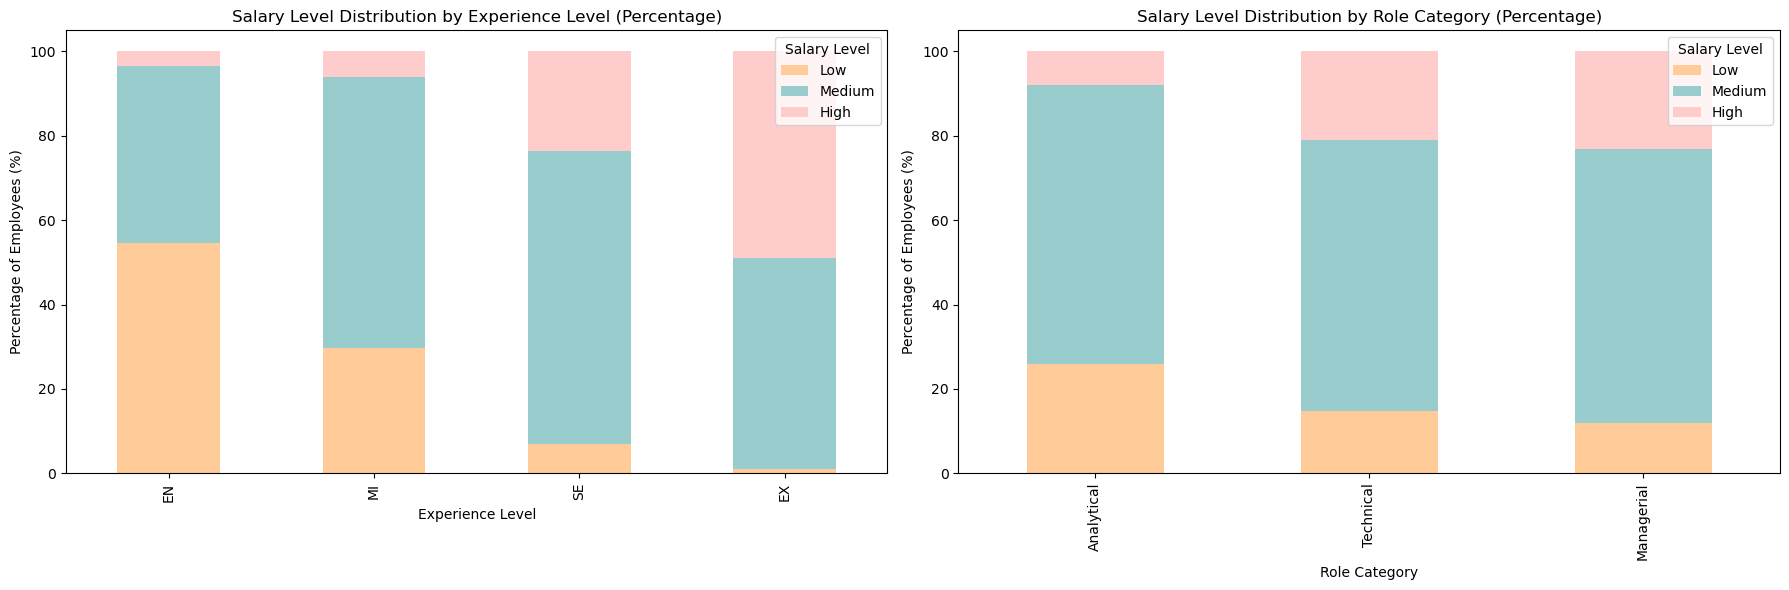

In [41]:
# 1. Set the custom order for 'experience_level' and 'role_category'
experience_order = ['EN', 'MI', 'SE', 'EX']
role_category_order = ['Analytical', 'Technical', 'Managerial']

# 2. Calculate the percentage of each salary level within each experience level
salary_level_distribution_by_experience = df_cleaned.groupby(['experience_level', 'salary_level']).size().unstack(fill_value=0)
salary_level_percentage_by_experience = salary_level_distribution_by_experience.div(salary_level_distribution_by_experience.sum(axis=1), axis=0) * 100

# 3. Calculate the percentage of each salary level within each role category
salary_level_distribution_by_role = df_cleaned.groupby(['role_category', 'salary_level']).size().unstack(fill_value=0)
salary_level_percentage_by_role = salary_level_distribution_by_role.div(salary_level_distribution_by_role.sum(axis=1), axis=0) * 100

# 4. Create a 2x1 subplot layout (two graphs in one figure)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the first graph (Salary Level Distribution by Experience Level)
salary_level_percentage_by_experience.loc[experience_order].plot(kind='bar', stacked=True, color=['#FFCC99', '#99CCCC', '#FFCCCC'], ax=axes[0])
axes[0].set_title('Salary Level Distribution by Experience Level (Percentage)')
axes[0].set_xlabel('Experience Level')
axes[0].set_ylabel('Percentage of Employees (%)')
axes[0].legend(title='Salary Level')

# Plot the second graph (Salary Level Distribution by Role Category)
salary_level_percentage_by_role.loc[role_category_order].plot(kind='bar', stacked=True, color=['#FFCC99', '#99CCCC', '#FFCCCC'], ax=axes[1])
axes[1].set_title('Salary Level Distribution by Role Category (Percentage)')
axes[1].set_xlabel('Role Category')
axes[1].set_ylabel('Percentage of Employees (%)')
axes[1].legend(title='Salary Level')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

(Temporal Comparison)
- 2. How did the proportion of remote work change from 2020 to 2023?

/var/folders/g6/ypqsg6fx0cv23h420cpm0r7w0000gn/T/ipykernel_6165/1459164441.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned[df_selected['remote_ratio'].isin([0, 50, 100])]


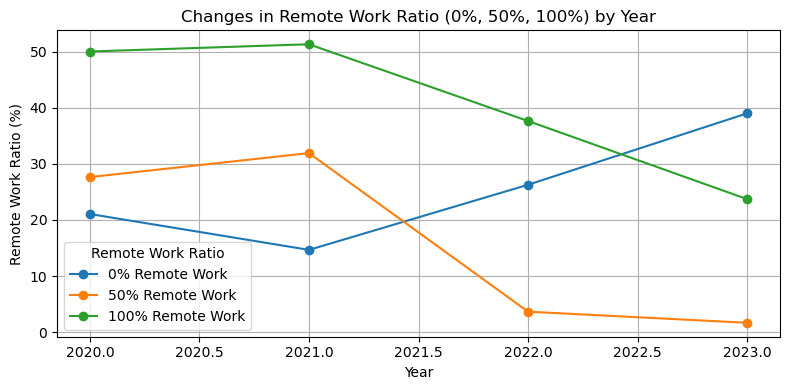

In [43]:
# Calculate the percentage of fully remote (remote_ratio == 100), partially remote (remote_ratio == 50), and non-remote (remote_ratio == 0) work by year
remote_ratios_by_year = (
    df_cleaned[df_selected['remote_ratio'].isin([0, 50, 100])]
    .groupby(['work_year', 'remote_ratio'])
    .size()
    .unstack(fill_value=0)
    .div(df.groupby('work_year').size(), axis=0) * 100
).round(2)

# Plot the line chart
plt.figure(figsize=(8, 4))
for ratio in [0, 50, 100]:
    plt.plot(remote_ratios_by_year.index, remote_ratios_by_year[ratio], marker='o', label=f'{ratio}% Remote Work')

plt.title("Changes in Remote Work Ratio (0%, 50%, 100%) by Year")
plt.xlabel("Year")
plt.ylabel("Remote Work Ratio (%)")
plt.legend(title="Remote Work Ratio")
plt.grid(True)
plt.tight_layout()
plt.show()

（Comparative Question）
- 3. What is the proportion of cross-border employment in the United States, Canada, Germany, and India?

Cross-Border Hire Ratio (%) = ( Number of Cross-Border Hires / Total Hires ) * 100

(DE) Germany
(CA) Canada
(IN) India
(US) United States

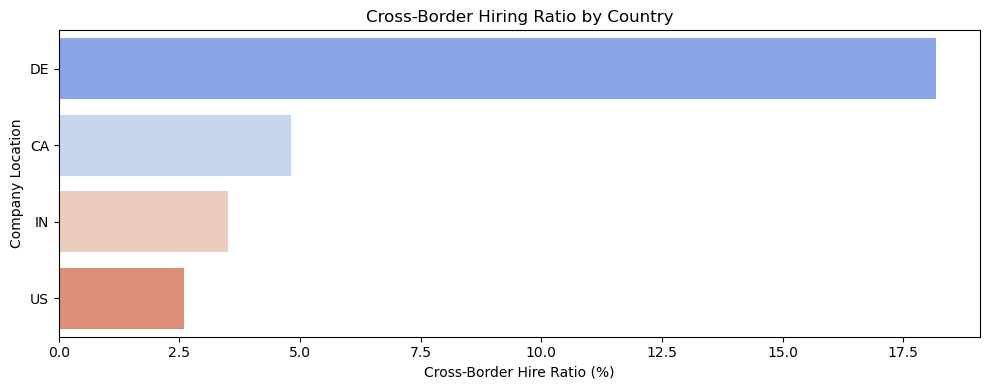

In [45]:
df_cleaned['is_cross_country'] = df_cleaned['employee_residence'] != df_cleaned['company_location']

# Calculate total hires and cross-border hires per country
cross_country_stats = df_cleaned[df_cleaned['company_location'].isin(['US', 'DE', 'CA', 'IN'])].groupby('company_location')['is_cross_country'].agg(['count', 'sum'])

# Compute the cross-border hire ratio (%) and round to 2 decimal places
cross_country_stats['cross_hire_ratio'] = (cross_country_stats['sum'] / cross_country_stats['count'] * 100).round(2)

# Step 3: Sort countries by cross-border ratio in descending order
cross_country_stats_sorted = cross_country_stats.sort_values(by='cross_hire_ratio', ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(10, 4))
sns.barplot(
    data=cross_country_stats_sorted,
    x='cross_hire_ratio',               # X-axis: percentage
    y=cross_country_stats_sorted.index, # Y-axis: country
    hue=cross_country_stats_sorted.index, 
    palette='coolwarm'               
)

# Add chart title and axis labels
plt.title("Cross-Border Hiring Ratio by Country")
plt.xlabel("Cross-Border Hire Ratio (%)")
plt.ylabel("Company Location")
plt.tight_layout()
plt.show()

(Related questions)  
- 4. Do larger company sizes tend to offer higher average salaries within the same role category?

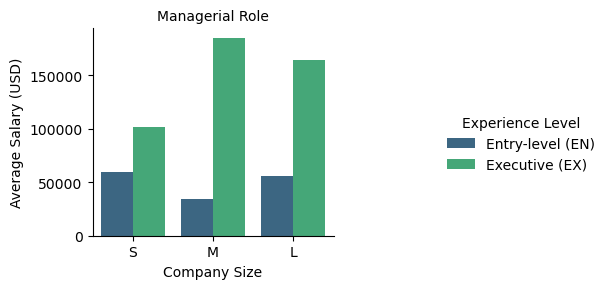

In [47]:
# Calculate average salary for each role type by company size
df_manager = df_cleaned[df_cleaned['role_category'] == 'Managerial']
avg_salary_summary = (
    df_manager[df_manager['experience_level'].isin (['EN', 'EX'])]
    .groupby(['role_category', 'company_size', 'experience_level'])['salary_in_usd']
    .mean()
    .reset_index()
    .rename(columns={'salary_in_usd': 'avg_salary_per_role_and_company_size'})
)
# Visualization
company_order = ['S', 'M', 'L']


g = sns.FacetGrid(
    avg_salary_summary,
    col="role_category",
    col_wrap=2,       
    height=3,         
    aspect=0.8,     
    sharey=True
)


g.map_dataframe(
    sns.barplot,
    x="company_size",
    y="avg_salary_per_role_and_company_size",
    hue="experience_level",         
    order=company_order,
    palette="viridis",
    legend=True                  
)
g.add_legend(title="Experience Level")
new_labels = ['Entry-level (EN)', 'Executive (EX)']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.set_axis_labels("Company Size", "Average Salary (USD)")
g.set_titles("{col_name} Role")

plt.tight_layout()
plt.show()

# Project Assignment 5

### 1. Based on Question 4, use ANOVA to test whether there is a statistically significant difference in average salaries across different company sizes.

### Statistical Test : 
- Since there are three company sizes (S, M, L), a one-way ANOVA should be used. (If there are 2 groups → t-test; if there are more than 2 groups → ANOVA)

### Null and Alternative Hypotheses:
- H₀ (Null Hypothesis): There is no difference in the average salaries across different company sizes.
- Hₐ (Alternative Hypothesis): There is a difference in the average salaries across different company sizes.

In [52]:
from scipy.stats import f_oneway

# Separate the three types of company sizes
salary_small = df_manager[df_manager['company_size'] == 'S']['salary_in_usd']
salary_medium = df_manager[df_manager['company_size'] == 'M']['salary_in_usd']
salary_large = df_manager[df_manager['company_size'] == 'L']['salary_in_usd']

# One-way ANOVA test
f_stat, p_value = f_oneway(salary_small, salary_medium, salary_large)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Explain the conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average salaries among different company sizes.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average salaries among different company sizes.")


F-statistic: 4.2947
P-value: 0.0151
Reject the null hypothesis: There is a significant difference in average salaries among different company sizes.


### Conclusion: 
- p-value less than 0.05 ➔ Reject

### 2. Based on Question 1, is there any correlation between job type and salary grade using the Chi-Square Test?

### Statistical Test : 
-  Chi-Square Test of Independence (Because we are looking at whether there is a correlation between two categories of variables, we need to use the chi-square test.)

### Null and Alternative Hypotheses:
- H₀ (Null Hypothesis): There is no association between experience level (or role category) and salary level.
- H₁ (Alternative Hypothesis): There is an association between experience level (or role category) and salary level.

In [57]:
from scipy.stats import chi2_contingency


# Create a contingency table for Experience Level vs Salary Level
contingency_table = pd.crosstab(df_cleaned['experience_level'], df_cleaned['salary_level'])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the test results
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")

# Create a contingency table for Role Category vs Salary Level
contingency_table_role = pd.crosstab(df_cleaned['role_category'], df_cleaned['salary_level'])

# Perform Chi-Square Test of Independence
chi2_role, p_role, dof_role, expected_role = chi2_contingency(contingency_table_role)

# Output the test results
print(f"Chi-square statistic (Role Category): {chi2_role}")
print(f"p-value (Role Category): {p_role}")

Chi-square statistic: 580.6900986193776
p-value: 3.4082986542816393e-122
Chi-square statistic (Role Category): 77.52811052394469
p-value (Role Category): 1.156673066997677e-14


### Conclusion: 
- For Experience Level vs Salary Level:
    Chi-square statistic = 580.69
    p-value = 3.41 × 10⁻¹²²
    Since p-value << 0.05, we reject the null hypothesis.
  
    => Conclusion: There is a significant association between experience level and salary level.

- For Role Category vs Salary Level:
    Chi-square statistic = 77.53
    p-value = 1.16 × 10⁻¹⁴
    Since p-value << 0.05, we reject the null hypothesis.

    =>Conclusion: There is a significant association between role category and salary level.